*Question 1:* Consider the simple linear regression problem $y = \beta_0 + \beta_1 x + \epsilon$,  where $\epsilon \sim \mathcal{N}(0, \sigma^2)$. Assume we are given training data $\{(x_i, y_i)\}_{i=1}^n$ and let $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ be the fitted model. Define $e_i = y_i - \hat{y}_i$. Show the following:

1. $\sum_{i=1}^n e_i = 0$.
1. The regression line always goes through the point $(\bar{x}, \bar{y})$.

*Question 1.1*: Show $\sum_{i=1}^n e_i = 0$.

a. $e_i = y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i$

b. $\sum^n_{i=1} (e_i) = \sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$

c. $\frac{\partial}{\partial \hat{\beta}_0} \sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2 = 0$

d. $-\sum^n_{i=1} 2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$ = 0

e. $\sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$

f. $\sum_{i=1}^n e_i = 0$ Q.E.D.

*Question 1.2*: Show the regression line always goes through the point $(\bar{x}, \bar{y})$.

a. $n \bar{x} = \sum^n_{i=1} x_i$,  $n \bar{y} = \sum^n_{i=1} y_i$

b. $\sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$ (from 1.1)

c. $n \bar{y} - n \hat{\beta}_0 - n \hat{\beta}_1 \bar{x} = 0$ (plug 1.2.a into 1.2.b)

d. $\bar{y} - \hat{\beta}_0 - \hat{\beta}_1 \bar{x} = 0$

e. $\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$ 

1.2.a-e shows that to minimize the error implies that there is a line going through $(\bar{x}, \bar{y})$.

*Question 2:* This question involves the use of multiple linear regression on `Auto` data set. For most of the analysis, you will need to remove the name variable.

1. Produce a scatterplot matrix of all of the variables (you can use the `pair()` command for this).
1. Use the `lm()` function to perform a multiple linear regression with mpg as the response variable. Use the `summary()` command to print the results. Comment on your findings.
1. Use the `ggplot()` package to plot your findings.
1. Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.

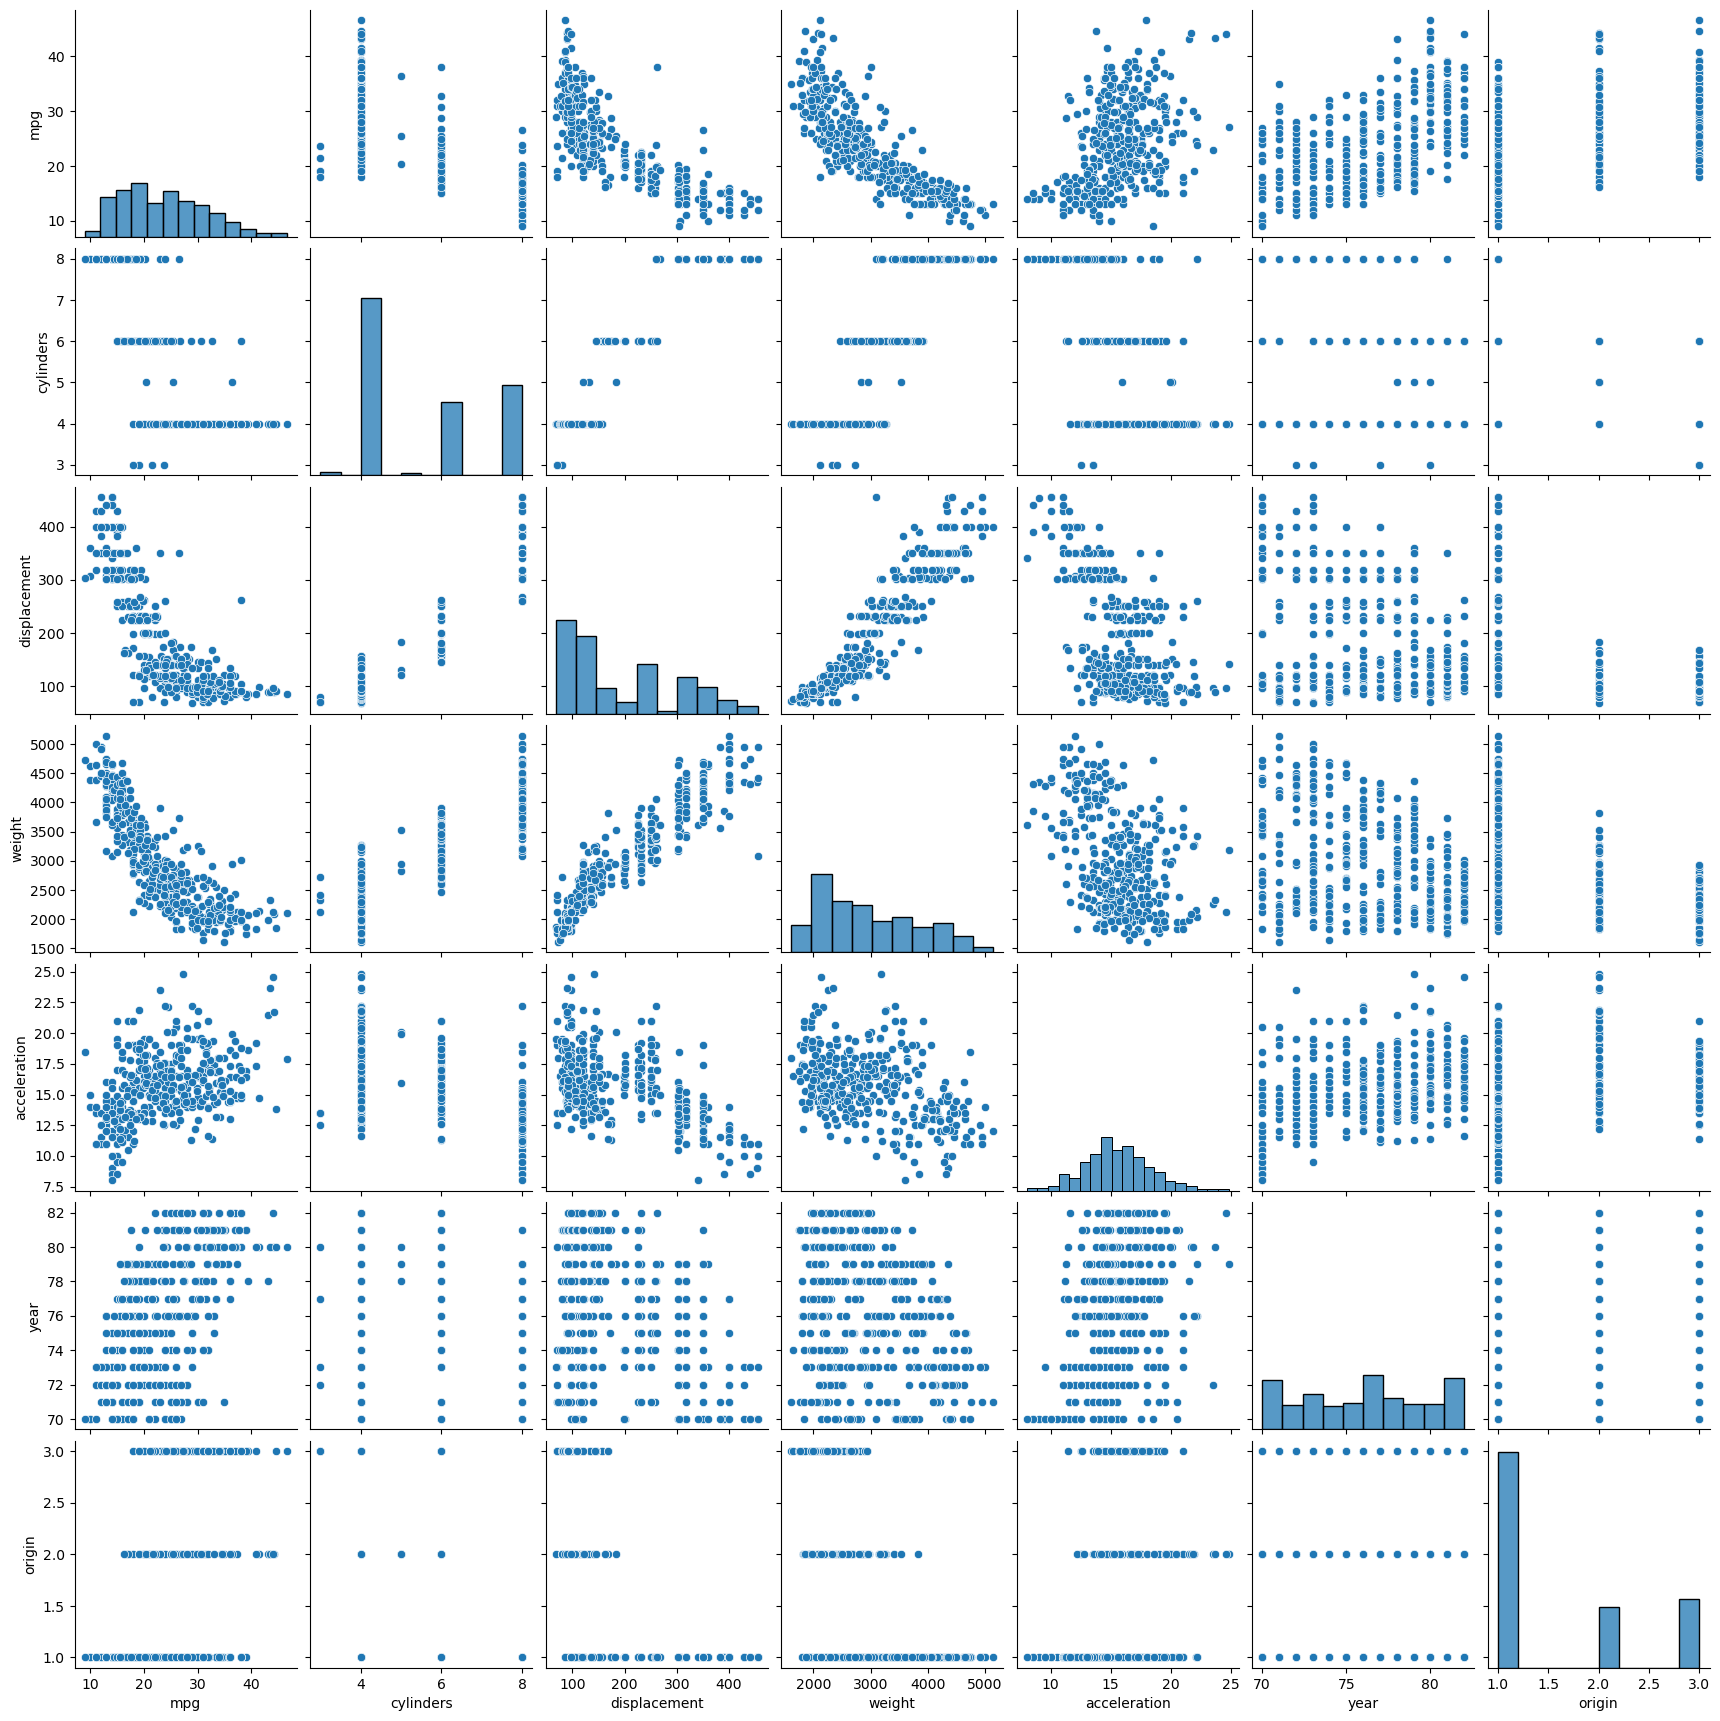

In [1]:
#Q2.1: Produce a scatterplot matrix of all of the variables (in python)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading Auto.csv
auto = pd.read_csv("Auto.csv")

#creating the scatterplot matrix
sns.pairplot(auto)
plt.show()

#the diagonal plots are not scatterplots but instead histograms
#they show the distribution of the variable instead of a scatter plot of a variable against itself which would be uninformative

In [2]:
#Q2.2
from sklearn.linear_model import LinearRegression
from scipy.stats import t
import statsmodels.api as sm

#there is a problem with ?'s in the horsepower category
auto['horsepower'].replace('?', np.nan, inplace=True) #replaces ?'s with NaN
auto['horsepower'] = auto['horsepower'].astype(float) #converts the series to float
hp_mu = auto['horsepower'].mean() #calculates the mean of the series
auto['horsepower'].replace(np.nan, hp_mu, inplace=True) #replaces the NaNs with mean floats they do not disrupt regression

y = auto['mpg'] #response variable; a column being a pandas Series
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']] #predictors; returns a new pandas DataFrame with just these columns from an input of a list of columns

#an instance of the LinearRegression class
model = LinearRegression()

#fitting the model using the data
model.fit(X, y)

def summary(model, X, y): #building a clone of the R language summary function
    #model is a fitted scikit-learn model, X is the predictor matrix, y is the response
    
    coef = model.coef_ #this prints the "beta hat one"s
    intercept = model.intercept_ #this prints the "beta hat zero" (mean of the dependent variable when set all of the independent variables to zero)
    Rsq = model.score(X, y) #R squared
    y_hat = model.predict(X)
    residuals = y - y_hat #residual errors
    
    n = y.shape[0] #this gives the number of rows
    k = X.shape[1] #this gives the number of columns
    adjRsq = 1 - (1-Rsq)*(n-1) / (n - k - 1) #a formula for adjusted R squared
    
    df = n - k - 1 #Degrees of freedom
    
    TSS = np.sum((y - y.mean())**2) #total sum of squares
    RSS = np.sum((y - y_hat)**2) #residual sum of squres
    F = (TSS - RSS)/k/(RSS / df) #F statistic
      
    # More accurate calculation of standard error for each coefficient
    X_with_const = sm.add_constant(X)  # Adding a constant for the intercept term
    mse = RSS / df
    se = np.sqrt(np.diagonal(mse * np.linalg.inv(np.dot(X_with_const.T, X_with_const)))) #computing the standard error
    
    full_coef = np.append(intercept, coef)
    t_scores = full_coef / se #t-score
    p_values = 2 * (1 - t.cdf(np.abs(t_scores), df)) #p-value
    
    # Print summary with labeled coefficients
    column_names = ['Intercept'] + list(X.columns)
    print("Summary:")
    print("========")
    for name, coef, t_value, p_value in zip(column_names, full_coef, t_scores, p_values):
        print(f"{name}: Coef: {coef}, t-value: {t_value}, p-value: {p_value}")
    
    print("--------")
    print("Residuals:", residuals)
    print("R-squared:", Rsq)
    print("Adjusted R-squared:", adjRsq)
    print("F-statistic:", F)
    print("Degrees of Freedom:", df)

summary(model, X, y)

Summary:
Intercept: Coef: -18.711571750088723, t-value: -4.059871034565358, p-value: 5.938216213352554e-05
cylinders: Coef: -0.4452052028925227, t-value: -1.380467126918702, p-value: 0.1682355757077283
displacement: Coef: 0.018912652113074566, t-value: 2.523510556175004, p-value: 0.0120164499686497
horsepower: Coef: -0.009394051949748709, t-value: -0.7088679326213323, p-value: 0.47883103593124643
weight: Coef: -0.006732427654902929, t-value: -10.507992029779759, p-value: 0.0
acceleration: Coef: 0.11788840257546618, t-value: 1.2173035242140464, p-value: 0.22422670191060767
year: Coef: 0.7624582872544831, t-value: 15.071432079772883, p-value: 0.0
origin: Coef: 1.3967994182129289, t-value: 5.073202542860013, p-value: 6.069968665478598e-07
--------
Residuals: 0      3.095142
1      0.942063
2      2.735067
3      0.861759
4      2.090195
         ...   
392   -1.321455
393    9.271194
394    0.893322
395   -1.473476
396    2.118888
Name: mpg, Length: 397, dtype: float64
R-squared: 0.821626

*Q2.2 Comment on your findings:* There is a negative intercept ($\hat{\beta}_0$)on the mpg with high confidence (p < 0.05), a negative correlation on the cylinders with the mpg having low confidence (p > 0.05), a positive correlation between displacement and the mpg with high confidence (p < 0.05), a negligible negative correlation between horsepower and mpg with very low confidence (p > 0.05), negligible correlation between the weight and the mpg with high confidence (p < 0.05) a positive correlation between acceleration and mpg with low confidence (p > 0.05), a positive correlation between year and mpg with high confidence (p < 0.05), and positive correlation between origin and mpg with high confidence (p< 0.05). However, a categorical/discrete sorting algorithm is probably better for origin and cylinders, as these are not continuous variables. Year is somewhere in the middle, because although these integer values are fundamentally discrete, linear regression is still useful in interpreting this data because it makes sense that the mpg would increase through time due to technological innovation around efficiency in the auto industry. With overall $R^2$ and adjusted $R^2$ values being $> 0.8$, we can be confident in the predictive power of this multilinear regression model overall.

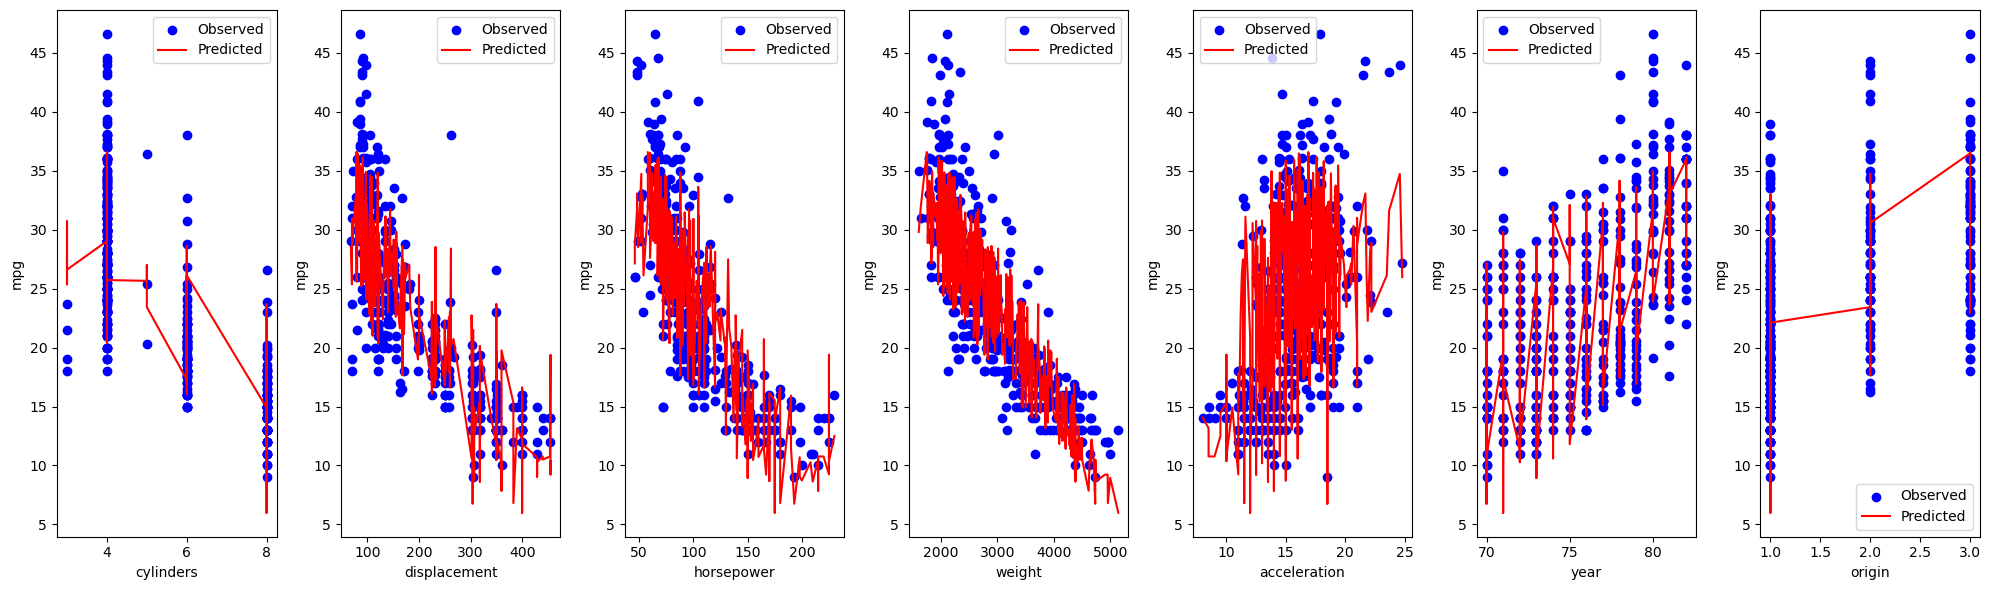

In [3]:
#Q2.3:Use matplotlib to plot the findings

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(20, 6))

y_hat = model.predict(X)

# Make sure to loop over each subplot and variable name
for ax, var in zip(axes, X.columns):
    ax.set_xlabel(var)
    ax.set_ylabel('mpg')
    
    # Plot observed values
    ax.scatter(X[var], y, label='Observed', color='b')
    
    # Plot predicted values
    sorted_order = X[var].argsort()
    ax.plot(X[var].iloc[sorted_order], y_hat[sorted_order], label='Predicted', color='r')
    
    ax.legend()

plt.tight_layout()
plt.show()

Summary:
Intercept: Coef: -53.90839978418012, t-value: -5.941617359889676, p-value: 6.271484664921445e-09
cylinders: Coef: 0.01001109458295072, t-value: 0.0065121229523148385, p-value: 0.9948074526386175
displacement: Coef: 0.20171791114103044, t-value: 0.878725694592024, p-value: 0.38009247456313355
horsepower: Coef: -0.5426986432279476, t-value: -1.8678181876041224, p-value: 0.0625391110568716
weight: Coef: -0.6657568270898705, t-value: -8.657160340920045, p-value: 0.0
acceleration: Coef: -0.35242383260914273, t-value: -0.4363281474534296, p-value: 0.6628407237826544
year: Coef: 13.037938040295607, t-value: 15.289907896700349, p-value: 0.0
origin: Coef: 3.1507398404143245, t-value: 4.142821290464302, p-value: 4.211447346524899e-05
--------
Residuals: 0      2.929499
1      1.496631
2      2.889451
3      1.004459
4      1.802617
         ...   
392   -1.122353
393    9.769696
394    0.398417
395   -1.082200
396    2.661844
Name: mpg, Length: 397, dtype: float64
R-squared: 0.833523988

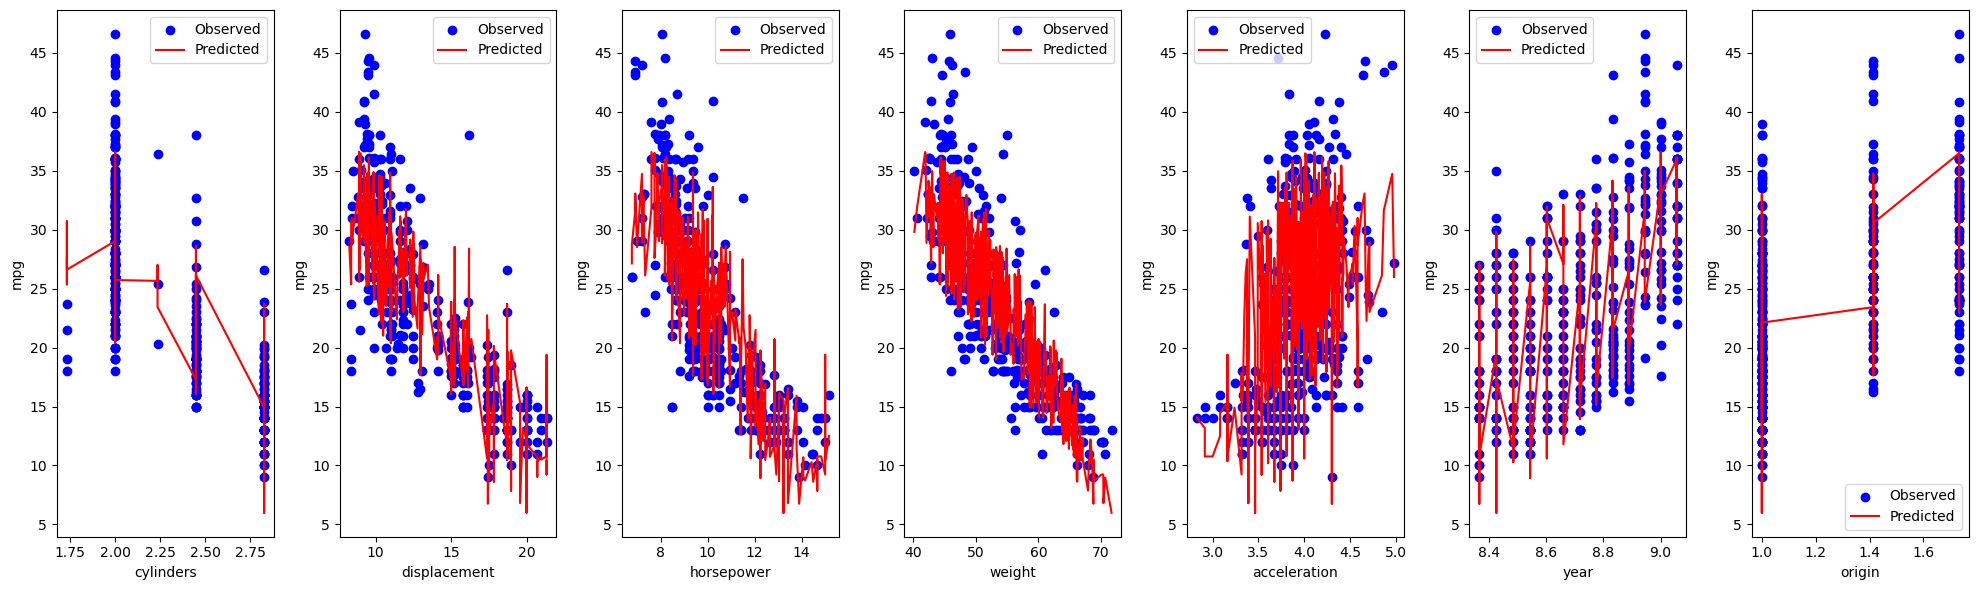

In [4]:
#Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.
#this cell is doing the square root of X$
#It is notable that there is a slightly higher R^2 value when the regression is performed against sqrtXS

sqrtX = np.sqrt(X)

#an instance of the LinearRegression class
sqrt_model = LinearRegression()

#fitting the model using the data
sqrt_model.fit(sqrtX, y)

summary(sqrt_model, sqrtX, y)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(20, 6))

y_hat = model.predict(sqrtX**2)


for ax, var in zip(axes, sqrtX.columns):
    ax.set_xlabel(var)
    ax.set_ylabel('mpg')
    
    # Plot observed values
    ax.scatter(sqrtX[var], y, label='Observed', color='b')
    
    # Plot predicted values
    sorted_order = sqrtX[var].argsort()
    ax.plot(sqrtX[var].iloc[sorted_order], y_hat[sorted_order], label='Predicted', color='r')
    
    ax.legend()

plt.tight_layout()
plt.show()


Summary:
Intercept: Coef: 0.7762692295763891, t-value: 0.33020921366204986, p-value: 0.7414196463901093
cylinders: Coef: -0.08551271563327613, t-value: -3.3933968657499842, p-value: 0.0007612308099820275
displacement: Coef: 5.5220872356557254e-05, t-value: 3.996772231957545, p-value: 7.682476841730512e-05
horsepower: Coef: -1.9725856250139424e-05, t-value: -0.4010026404739809, p-value: 0.6886383501541509
weight: Coef: -9.578927564823575e-07, t-value: -10.714700165475183, p-value: 0.0
acceleration: Coef: 0.006817551550865595, t-value: 2.5460806642695197, p-value: 0.011278764564458532
year: Coef: 0.005056817960783975, t-value: 14.404811530467068, p-value: 0.0
origin: Coef: 0.40815512066865683, t-value: 5.928078618370392, p-value: 6.76437705848798e-09
--------
Residuals: 0      3.418132
1      0.444820
2      2.853708
3      1.158028
4      2.503319
         ...   
392   -1.957488
393    8.711189
394    1.442396
395   -2.248457
396    1.053409
Name: mpg, Length: 397, dtype: float64
R-squa

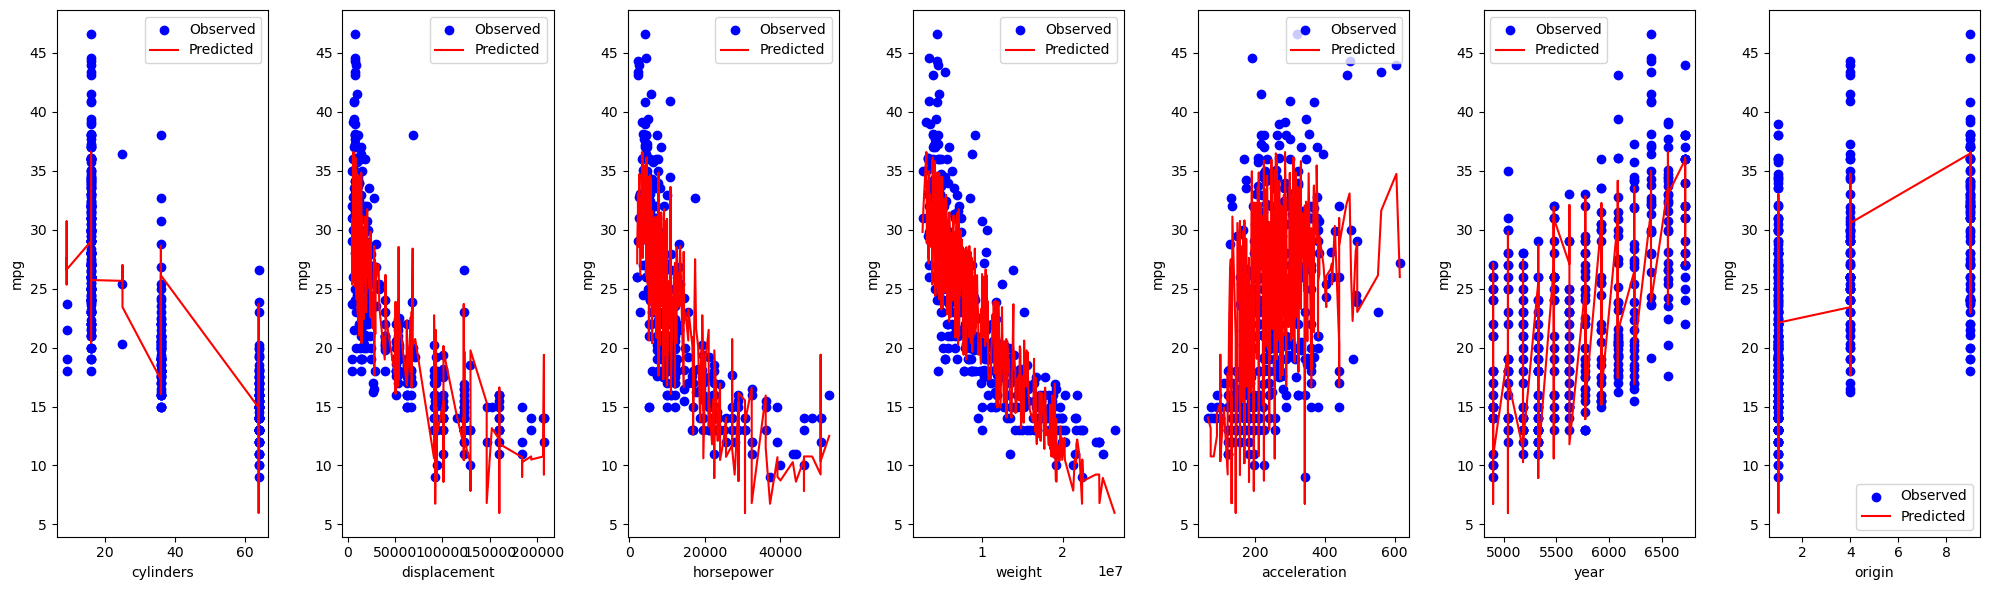

In [5]:
#Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.
#this cell is doing the square of X
#It is notable that there is a slightly lower R^2 value when the regression is performed against $X^2$

sqX = X**2

#an instance of the LinearRegression class
sq_model = LinearRegression()

#fitting the model using the data
sq_model.fit(sqX, y)

summary(sq_model, sqX, y)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(20, 6))

y_hat = model.predict(np.sqrt(sqX))


for ax, var in zip(axes, sqX.columns):
    ax.set_xlabel(var)
    ax.set_ylabel('mpg')
    
    # Plot observed values
    ax.scatter(sqX[var], y, label='Observed', color='b')
    
    # Plot predicted values
    sorted_order = sqX[var].argsort()
    ax.plot(sqX[var].iloc[sorted_order], y_hat[sorted_order], label='Predicted', color='r')
    
    ax.legend()

plt.tight_layout()
plt.show()

*Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings*:

The $R^2$ value of the model based on $X$ is $0.8216$, the $R^2$ value of the model based on $\sqrt{X}$ is $0.8335$, and the $R^2$ value of the model based on $X^2$ is $0.7941$. The multilinear regression model based on the square root of the predictors is preferred.